<a href="https://colab.research.google.com/github/panahiparham/mlclass_proj_f2021/blob/main/Models/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM models


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, mean_absolute_error, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [4]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler

## Support Vector Regression on QM9

In [6]:
# SVM are typically not used with large datasets
# Because SVM stores the kernel matrix, which is of O(n^2) size 

In [7]:
# import data
qm9_features = np.load('/content/drive/MyDrive/Data Science @ SBU/Applied Machine Learning/project/qm9_preprocessed/qm9_features.npy')
qm9_labels_df = pd.read_csv('/content/drive/MyDrive/Data Science @ SBU/Applied Machine Learning/project/qm9_preprocessed/qm9_labels.csv')

In [8]:
# selecting 'gap' task
gap_labels = qm9_labels_df['gap'].to_numpy()
print('features shape:', qm9_features.shape)
print('labels shape:', gap_labels.shape)

features shape: (133885, 163)
labels shape: (133885,)


In [25]:
# Baseline - small train set

In [26]:
# train/test split (random split 0.1)
x_train, x_test, y_train, y_test =  train_test_split(qm9_features, gap_labels , test_size=0.9, random_state=42)

In [29]:
# train on x_train
model = SVR(kernel='linear').fit(x_train, y_train)

# score on x_train
print('Train MAE score:', mean_absolute_error(y_train,model.predict(x_train)))
print('Train r2 score:', model.score(x_train, y_train))
print()
# score on x_test
print('Test MAE score:', mean_absolute_error(y_test,model.predict(x_test)))
print('Test r2 score:', model.score(x_test, y_test))

Train MAE score: 0.026566971452956053
Train r2 score: 0.5096233512400322

Test MAE score: 0.026506751978069586
Test r2 score: 0.5103764028197942


In [30]:
# Experiment 1. small train set + feature and label standardization

In [31]:
# Normalizing features
x_scale = StandardScaler()

x_train_scaled = x_scale.fit_transform(x_train)
x_test_scaled = x_scale.transform(x_test)

# Normalizing labels
y_scale = StandardScaler()

y_train_scaled = y_scale.fit_transform(y_train.reshape(-1,1)).squeeze()
y_test_scaled = y_scale.transform(y_test.reshape(-1,1)).squeeze()

In [32]:
# Note that the scaler is fitted to the small train set

In [33]:
# train on x_train_scaled
model = SVR(kernel='linear').fit(x_train_scaled, y_train_scaled)

y_pred_train = model.predict(x_train_scaled)
y_pred_test  = model.predict(x_test_scaled)

In [34]:
# inverse transform to get comparable MAE
y_pred_train = y_scale.inverse_transform(y_pred_train.reshape(-1,1)).squeeze()
y_pred_test = y_scale.inverse_transform(y_pred_test.reshape(-1,1)).squeeze()


# score on x_train
print('Train MAE score:', mean_absolute_error(y_train,y_pred_train))
print('Train r2 score:', model.score(x_train_scaled, y_train_scaled))
print()
# score on x_test
print('Test MAE score:', mean_absolute_error(y_test,y_pred_test))
print('Test r2 score:', model.score(x_test_scaled, y_test_scaled))

Train MAE score: 0.01400773210394252
Train r2 score: 0.8352689467702423

Test MAE score: 0.014181892793103798
Test r2 score: 0.8280618808379323


In [21]:
# Experiment 2. small train set + feature and label standardization + RBF kernel

In [22]:
# train on x_train_scaled
model = SVR(kernel = 'rbf').fit(x_train_scaled, y_train_scaled)

y_pred_train = model.predict(x_train_scaled)
y_pred_test  = model.predict(x_test_scaled)

In [24]:
# inverse transform to get comparable MAE
y_pred_train = y_scale.inverse_transform(y_pred_train.reshape(-1,1)).squeeze()
y_pred_test = y_scale.inverse_transform(y_pred_test.reshape(-1,1)).squeeze()


# score on x_train
print('Train MAE score:', mean_absolute_error(y_train,y_pred_train))
print('Train r2 score:', model.score(x_train_scaled, y_train_scaled))
print()
# score on x_test
print('Test MAE score:', mean_absolute_error(y_test,y_pred_test))
print('Test r2 score:', model.score(x_test_scaled, y_test_scaled))

Train MAE score: 0.006802982800390955
Train r2 score: 0.9538395863184784

Test MAE score: 0.009678668928359158
Test r2 score: 0.9112962153410129


In [35]:
# Experiment 3 - small train set + standardization + PCA for dimensionality reduction

In [36]:
# train/test split (random split 0.5)
# x_train, x_test, y_train, y_test =  train_test_split(qm9_features, gap_labels , test_size=0.9, random_state=42)

In [37]:
# feature pipeline
pipe = Pipeline(
    steps=[
           ('scale', StandardScaler()),
           ('pca', PCA(n_components = 0.9)),
           ('svm', SVR(kernel='rbf'))
    ]
)

# label scaler
y_scale = StandardScaler()

y_train_scaled = y_scale.fit_transform(y_train.reshape(-1,1)).squeeze()
y_test_scaled = y_scale.transform(y_test.reshape(-1,1)).squeeze()

In [38]:
# train on x_train
model = pipe.fit(x_train, y_train_scaled)

y_pred_train = model.predict(x_train)
y_pred_test  = model.predict(x_test)

In [39]:
# inverse transform to get comparable MAE
y_pred_train = y_scale.inverse_transform(y_pred_train.reshape(-1,1)).squeeze()
y_pred_test = y_scale.inverse_transform(y_pred_test.reshape(-1,1)).squeeze()


# score on x_train
print('Train MAE score:', mean_absolute_error(y_train,y_pred_train))
print('Train r2 score:', model.score(x_train, y_train_scaled))
print()
# score on x_test
print('Test MAE score:', mean_absolute_error(y_test,y_pred_test))
print('Test r2 score:', model.score(x_test, y_test_scaled))

Train MAE score: 0.008536768124885522
Train r2 score: 0.9290776592398109

Test MAE score: 0.010975875981667854
Test r2 score: 0.8893311481821348


In [ ]:
# Even though the final model has a lower score, the reduced computation time due to lower dimensionality makes up for it

## Support Vector Classification on Tox21

In [40]:
# dataset load
tox21_path = '/content/drive/MyDrive/Data Science @ SBU/Applied Machine Learning/project/tox21_preprocessed'
tox21_features = pd.read_csv(tox21_path + '/tox21_x.csv').to_numpy()
tox21_label = pd.read_csv(tox21_path + '/tox21_y.csv').to_numpy()

Tox21 features shape: (7237, 190) dtype: float64


Text(0.5, 1.0, 'range of features')

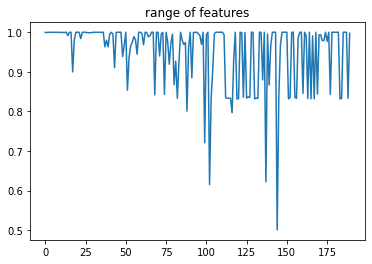

In [41]:
# exploring features
print('Tox21 features shape:', tox21_features.shape, 'dtype:', tox21_features.dtype)

feature_range = tox21_features.max(axis=0) - tox21_features.min(axis=0)
_ = plt.plot(feature_range)
plt.title('range of features')

In [42]:
# features are already scaled but serveral features are not in the [0, 1] range.
# they occupy a smaller range such as [0, 0.8]

In [43]:
# exploring labels
tox21_label = tox21_label.squeeze()
print('Tox21 features shape:', tox21_label.shape, 'dtype:', tox21_label.dtype)

num_pos_samples = np.count_nonzero(tox21_label)
print('Number of positive samples:', num_pos_samples)
print('Number of negative samples:', len(tox21_label) - num_pos_samples)

Tox21 features shape: (7237,) dtype: float64
Number of positive samples: 310
Number of negative samples: 6927


In [44]:
# labels are unbalanced, only a small portion of data is positive

In [45]:
# Training Overview
#
#   1. split data into train/test set by picking 20% of each label for test set (stratified split)
#
#   2. Baseline model -> Linear, soft SVM, without class weights
#       Report: training set score, 5-fold cross validation on training set mean score, test set score, train and test confusion matrices
#
#   3. Gridsearch for hyperparameter tuning on training set (tuning on choice of kernel, class weight)
#       CV method: 5-Fold Stratified CV on training set
#
#   4. Tuned model -> Kernelized, soft SVM with class weights
#       Report: training set score, 5-fold cross validation on training set mean score, test set score, train and test confusion matrices
#
# Scoring metric: ROC-AUC
# Dataset splitting method: Stratified on class label
# Cross Validation method: 5-Fold, Stratified, Repeated 3 times

In [50]:
# keep 20% of each class for final evaluation
x_train, x_test, y_train, y_test =  train_test_split(tox21_features, tox21_label , test_size=0.2, stratify=tox21_label, random_state = 42)

In [51]:
# Baseline - linear SVM

# cross validation score on x_train
model = SVC()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Training on x_train
model = SVC()
model.fit(x_train, y_train)

# Testing on x_test
y_pred = model.predict(x_test)

print('Train Set Score:', roc_auc_score(y_train, model.decision_function(x_train)))
print('Cross Validation Score:', np.mean(cv_scores))
print('Test Set Score:', roc_auc_score(y_test, model.decision_function(x_test)))

print('Training Confusion Matrix:')
print(confusion_matrix(y_train, model.predict(x_train)))
print()

print('Test Confusion Matrix:')
print(confusion_matrix(y_test, model.predict(x_test)))

Train Set Score: 0.9821713938907033
Cross Validation Score: 0.7865734501240119
Test Set Score: 0.6599636922217567
Training Confusion Matrix:
[[5533    8]
 [ 130  118]]

Test Confusion Matrix:
[[1384    2]
 [  43   19]]


In [52]:
# Gridsearch for Hyperparameter tuning
# Hyperparameters: kernel, class weights

model = SVC()

balance = [{0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:1,1:1000}]
kernel=['linear', 'poly', 'rbf']
param_grid = dict(class_weight=balance, kernel=kernel)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(x_train, y_train)

# Report gridsearch result
print(f"Best score: {grid_result.best_score_} Best params: {grid_result.best_params_}")
print()
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(f"score:{mean} params:{param}")

Best score: 0.798677163889811 Best params: {'class_weight': {0: 1, 1: 10}, 'kernel': 'rbf'}

score:0.7702337637414721 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'linear'}
score:0.7535353472636838 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'poly'}
score:0.7865734501240119 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'rbf'}
score:0.7783401141310907 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'linear'}
score:0.7504092914310709 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'poly'}
score:0.798677163889811 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'rbf'}
score:0.7536484074770429 params:{'class_weight': {0: 1, 1: 100}, 'kernel': 'linear'}
score:0.7434819008617662 params:{'class_weight': {0: 1, 1: 100}, 'kernel': 'poly'}
score:0.7881021334257922 params:{'class_weight': {0: 1, 1: 100}, 'kernel': 'rbf'}
score:0.7515774432927018 params:{'class_weight': {0: 1, 1: 1000}, 'kernel': 'linear'}
score:0.7434819008617662 params:{'class_weight': {0: 1, 1: 1000}, 'kernel': 'poly

In [53]:
# Tuned Kernelized Weighted Soft SVM

# cross validation on training set
tox21_SVM_model = SVC(**grid_result.best_params_)
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(tox21_SVM_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# training on x_train
tox21_SVM_model = SVC(**grid_result.best_params_)
tox21_SVM_model.fit(x_train, y_train)

# testing on x_test
y_pred = tox21_SVM_model.predict(x_test)


print('Train Set Score:', roc_auc_score(y_train, tox21_SVM_model.decision_function(x_train)))
print('Cross Validation Score:', np.mean(cv_scores))
print('Test Set Score:', roc_auc_score(y_test, tox21_SVM_model.decision_function(x_test)))
print()

print('Training Confusion Matrix:')
print(confusion_matrix(y_train, tox21_SVM_model.predict(x_train)))
print()

print('Test Confusion Matrix:')
print(confusion_matrix(y_test, tox21_SVM_model.predict(x_test)))

Train Set Score: 0.994813952879124
Cross Validation Score: 0.798677163889811
Test Set Score: 0.731345715216683

Training Confusion Matrix:
[[5468   73]
 [  25  223]]

Test Confusion Matrix:
[[1357   29]
 [  39   23]]


## Support Vector Classification on TOXCAST

In [54]:
# data load
toxcast_data = pd.read_csv('/content/drive/MyDrive/Data Science @ SBU/Applied Machine Learning/project/toxcast_preprocessed/final_toxcast.csv')
toxcast_label = toxcast_data['label'].to_numpy()
toxcast_features = toxcast_data.drop(['label'], axis=1).to_numpy()

Tox21 features shape: (7831, 135) dtype: float64


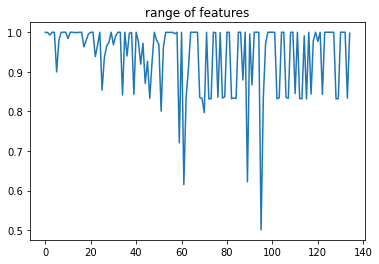

In [55]:
# exploring features
print('Tox21 features shape:', toxcast_features.shape, 'dtype:', toxcast_features.dtype)

feature_range = toxcast_features.max(axis=0) - toxcast_features.min(axis=0)
_ = plt.plot(feature_range)
_ = plt.title('range of features')

In [56]:
# features are already scaled but serveral features are not in the [0, 1] range.
# they occupy a smaller range such as [0, 0.8]

In [57]:
# exploring labels
print('Tox21 features shape:', toxcast_label.shape, 'dtype:', toxcast_label.dtype)

num_pos_samples = np.count_nonzero(toxcast_label)
print('Number of positive samples:', num_pos_samples)
print('Number of negative samples:', len(toxcast_label) - num_pos_samples)

Tox21 features shape: (7831,) dtype: float64
Number of positive samples: 1715
Number of negative samples: 6116


In [58]:
# labels are unbalanced, but it is not as bad as tox21!

In [59]:
# Training Overview
#
#   1. split data into train/test set by picking 20% of each label for test set (stratified split)
#
#   2. Baseline model -> Linear, soft SVM, without class weights
#       Report: training set score, 5-fold cross validation on training set mean score, test set score, train and test confusion matrices
#
#   3. Gridsearch for hyperparameter tuning on training set (tuning on choice of kernel, class weight)
#       CV method: 5-Fold Stratified CV on training set
#
#   4. Tuned model -> Kernelized, soft SVM with class weights
#       Report: training set score, 5-fold cross validation on training set mean score, test set score, train and test confusion matrices
#
# Scoring metric: ROC-AUC
# Dataset splitting method: Stratified on class label
# Cross Validation method: 5-Fold, Stratified, Repeated 3 times

In [60]:
# keep 20% of each class for final evaluation
x_train, x_test, y_train, y_test =  train_test_split(toxcast_features, toxcast_label , test_size=0.2, stratify=toxcast_label, random_state = 42)

In [61]:
# Baseline - linear SVM

# cross validation score on x_train
model = SVC()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Training on x_train
model = SVC()
model.fit(x_train, y_train)

# Testing on x_test
y_pred = model.predict(x_test)

print('Train Set Score:', roc_auc_score(y_train, model.decision_function(x_train)))
print('Cross Validation Score:', np.mean(cv_scores))
print('Test Set Score:', roc_auc_score(y_test, model.decision_function(x_test)))

print('Training Confusion Matrix:')
print(confusion_matrix(y_train, model.predict(x_train)))
print()

print('Test Confusion Matrix:')
print(confusion_matrix(y_test, model.predict(x_test)))

Train Set Score: 0.9432829287537933
Cross Validation Score: 0.8672893059312256
Test Set Score: 0.8696026029459403
Training Confusion Matrix:
[[4796   96]
 [ 609  763]]

Test Confusion Matrix:
[[1165   59]
 [ 175  168]]


In [62]:
# Gridsearch for Hyperparameter tuning
# Hyperparameters: kernel, class weights

model = SVC()

balance = [{0:1,1:1}, {0:1,1:5}, {0:1,1:10}]
kernel=['linear', 'poly', 'rbf']
param_grid = dict(class_weight=balance, kernel=kernel)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(x_train, y_train)

# Report gridsearch result
print(f"Best score: {grid_result.best_score_} Best params: {grid_result.best_params_}")
print()
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(f"score:{mean} params:{param}")

Best score: 0.8703792524611433 Best params: {'class_weight': {0: 1, 1: 5}, 'kernel': 'rbf'}

score:0.8299356466084217 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'linear'}
score:0.853887701747952 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'poly'}
score:0.8672893059312256 params:{'class_weight': {0: 1, 1: 1}, 'kernel': 'rbf'}
score:0.8315005578794967 params:{'class_weight': {0: 1, 1: 5}, 'kernel': 'linear'}
score:0.8432960330632017 params:{'class_weight': {0: 1, 1: 5}, 'kernel': 'poly'}
score:0.8703792524611433 params:{'class_weight': {0: 1, 1: 5}, 'kernel': 'rbf'}
score:0.826261720222717 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'linear'}
score:0.8325955588914226 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'poly'}
score:0.8621561212156585 params:{'class_weight': {0: 1, 1: 10}, 'kernel': 'rbf'}


In [63]:
# Tuned Kernelized Weighted Soft SVM

# cross validation on training set
toxcast_SVM_model = SVC(**grid_result.best_params_)
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(toxcast_SVM_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# training on x_train
toxcast_SVM_model = SVC(**grid_result.best_params_)
toxcast_SVM_model.fit(x_train, y_train)

# testing on x_test
y_pred = toxcast_SVM_model.predict(x_test)


print('Train Set Score:', roc_auc_score(y_train, toxcast_SVM_model.decision_function(x_train)))
print('Cross Validation Score:', np.mean(cv_scores))
print('Test Set Score:', roc_auc_score(y_test, toxcast_SVM_model.decision_function(x_test)))
print()

print('Training Confusion Matrix:')
print(confusion_matrix(y_train, toxcast_SVM_model.predict(x_train)))
print()

print('Test Confusion Matrix:')
print(confusion_matrix(y_test, toxcast_SVM_model.predict(x_test)))

Train Set Score: 0.9693543811637493
Cross Validation Score: 0.8703792524611433
Test Set Score: 0.8749952361897139

Training Confusion Matrix:
[[4186  706]
 [  55 1317]]

Test Confusion Matrix:
[[963 261]
 [ 61 282]]


# Further Explorations

## How does PCA interplay with different SVM kernels?

In [64]:
# TOXCAST task

In [65]:
pca = PCA()
svm = SVC()

pipe = Pipeline(
    steps=[('pca',pca), ('svm', svm)]
)

param_grid = {
    'pca__n_components': [0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, scoring='roc_auc', cv=cv)


grid_result = grid.fit(x_train, y_train)

# Report gridsearch result
print(f"Best score: {grid_result.best_score_} Best params: {grid_result.best_params_}")
print()
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(f"score:{mean} params:{param}")

Best score: 0.8711136641756579 Best params: {'pca__n_components': 0.99, 'svm__kernel': 'rbf'}

score:0.7626965414256357 params:{'pca__n_components': 0.5, 'svm__kernel': 'linear'}
score:0.7716755925759748 params:{'pca__n_components': 0.5, 'svm__kernel': 'poly'}
score:0.8044535889314145 params:{'pca__n_components': 0.5, 'svm__kernel': 'rbf'}
score:0.6252537579467811 params:{'pca__n_components': 0.5, 'svm__kernel': 'sigmoid'}
score:0.7821566225918611 params:{'pca__n_components': 0.6, 'svm__kernel': 'linear'}
score:0.8078071014650904 params:{'pca__n_components': 0.6, 'svm__kernel': 'poly'}
score:0.8306715232359461 params:{'pca__n_components': 0.6, 'svm__kernel': 'rbf'}
score:0.6357220453835575 params:{'pca__n_components': 0.6, 'svm__kernel': 'sigmoid'}
score:0.7855307686799571 params:{'pca__n_components': 0.7, 'svm__kernel': 'linear'}
score:0.8130091398772571 params:{'pca__n_components': 0.7, 'svm__kernel': 'poly'}
score:0.8414249628304385 params:{'pca__n_components': 0.7, 'svm__kernel': '